In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("DATA.csv")

In [28]:
df = pd.read_csv("DATA.csv")   # replace with your file name
print(df.head())               # shows first 5 rows

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [29]:
df = pd.read_csv("data.csv")   # replace with your file name
print(df.info())               # shows first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [30]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('DATA.csv')

# Display first few rows to understand the data
print(df.head())

# Step 2: Handle missing values
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Option 1: Drop rows with missing values
# df_cleaned = df.dropna()

# Option 2: Fill missing values (imputation) – Fill with mean for numeric columns (e.g., FHR)
columns_to_impute = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
for column in columns_to_impute:
    df[column] = df[column].fillna(df[column].mean())  # Using mean for imputation of numerical columns

# Step 3: Correct data types (ensure numerical columns are actually numeric)
# Convert columns to appropriate types (if necessary)
numeric_columns = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Coerce invalid parsing to NaN

# Check data types to ensure correctness
print(df.dtypes)

# Step 4: Detect and treat outliers using the IQR method
# Apply IQR to each of the numeric columns
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Display cleaned data
print(df.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
Missing Values:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
LB          float64
AC          float64
FM          float64
UC          float64
DL      

In [31]:
# Step 1: Generate a statistical summary for each numeric variable
summary_stats = df.describe()

# Calculate additional measures of central tendency and dispersion
# Median (central tendency)
median_stats = df.median()

# Interquartile Range (IQR) = Q3 - Q1
iqr_stats = df.quantile(0.75) - df.quantile(0.25)

# Standard deviation (from describe() already included, but let's calculate it again for clarity)
std_dev_stats = df.std()

# Combine all the results into a single DataFrame for easy viewing
summary_df = pd.DataFrame({
    'Mean': summary_stats.loc['mean'],
    'Median': median_stats,
    'Standard Deviation': std_dev_stats,
    'IQR': iqr_stats
})

# Display the summary statistics
print(summary_df)


                Mean      Median  Standard Deviation        IQR
LB        133.374841  134.000000            9.922809  15.293927
AC          0.003421    0.002329            0.003678   0.006056
FM          0.000651    0.000000            0.001374   0.000848
UC          0.004637    0.004775            0.002803   0.004073
DL          0.001367    0.000000            0.002180   0.002278
DS          0.000000    0.000000            0.000000   0.000000
DP          0.000000    0.000000            0.000000   0.000000
ASTV       45.427017   45.000000           16.083774  26.000000
MSTV        1.143323    1.100000            0.531486   0.800000
ALTV        6.358767    0.000000           10.236439   9.000000
MLTV        8.407578    8.100000            4.172389   5.175000
Width      63.413025   57.000000           36.359779  53.000000
Tendency    0.354200    0.000000            0.638780   1.000000
NSP         1.139412    1.000000            0.431729   0.000000


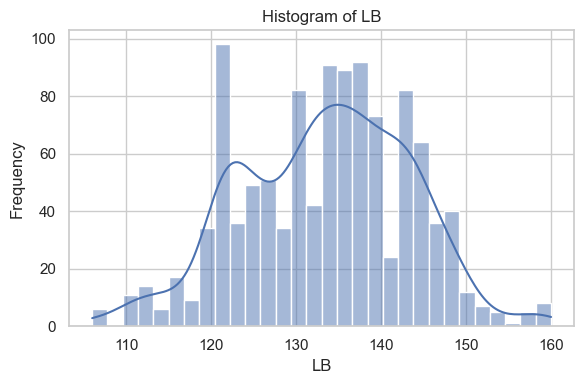

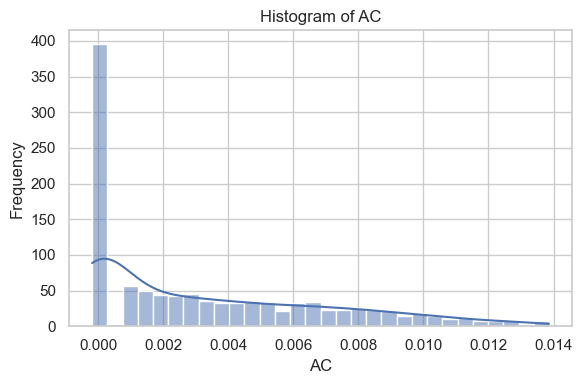

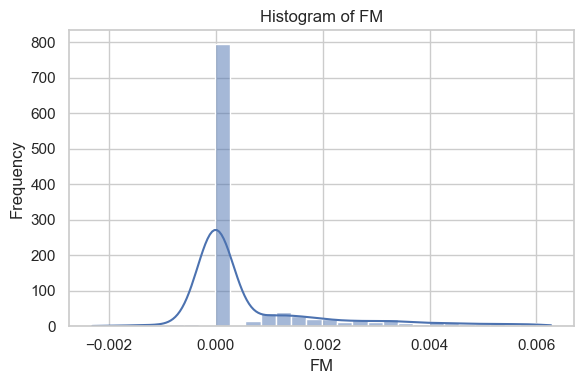

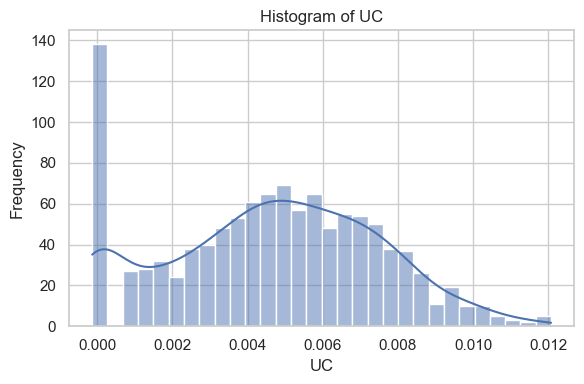

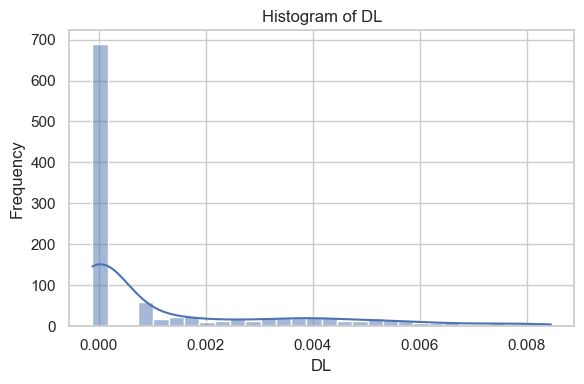

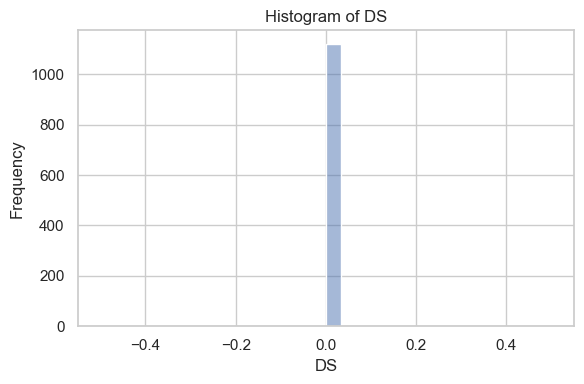

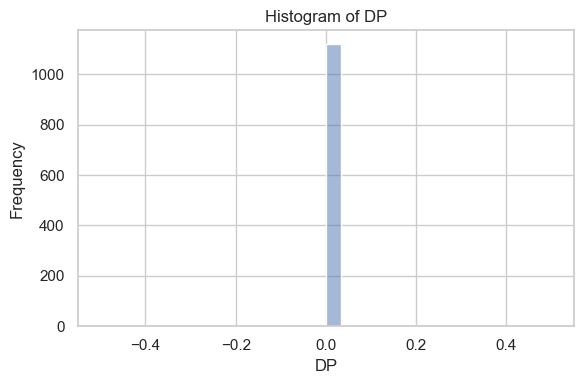

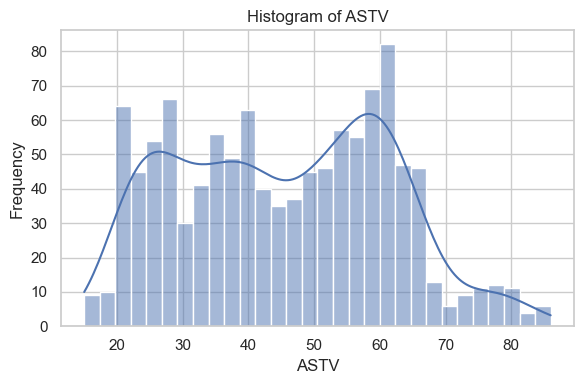

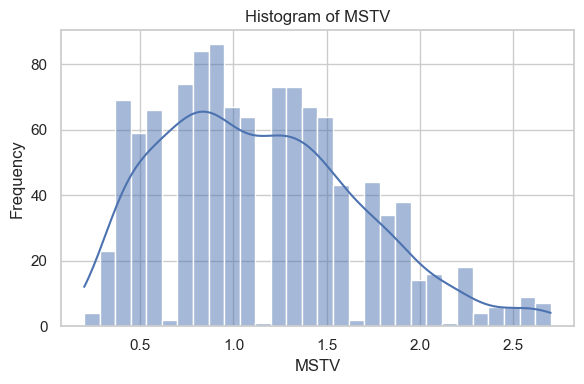

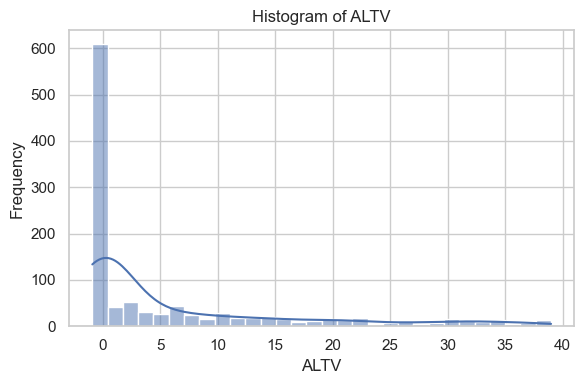

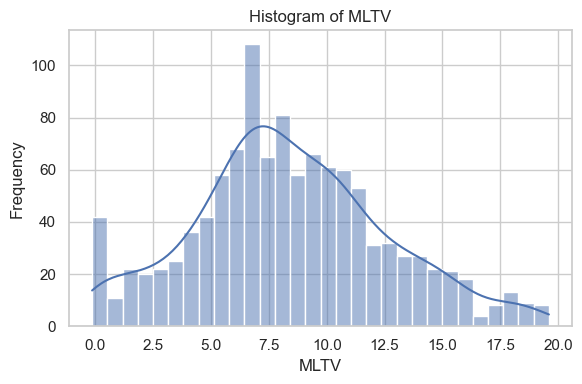

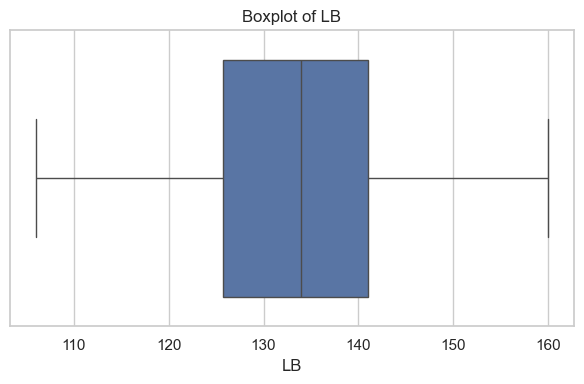

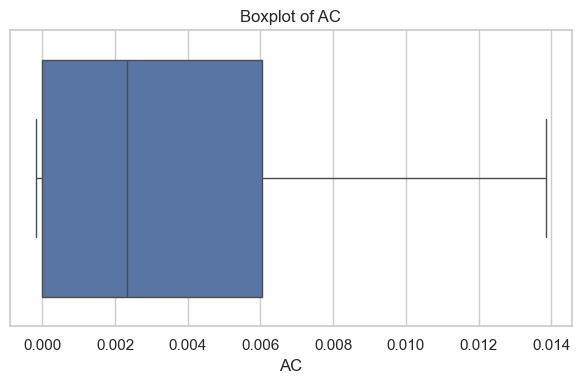

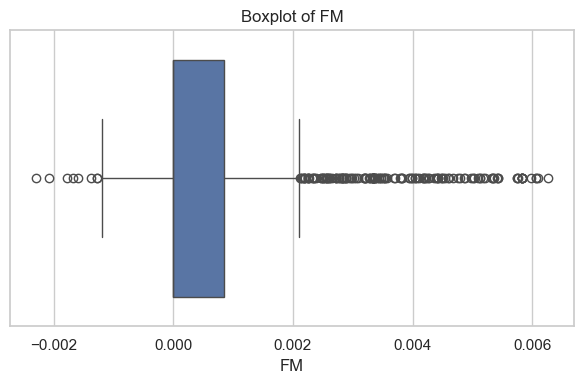

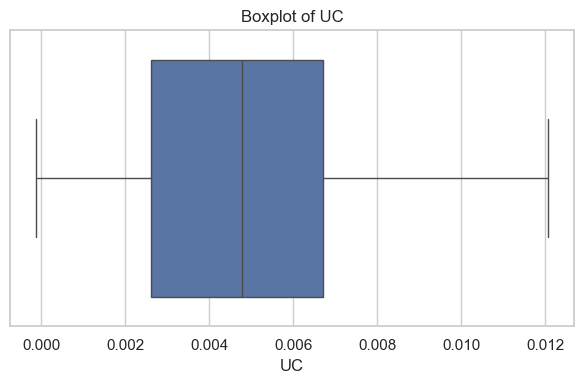

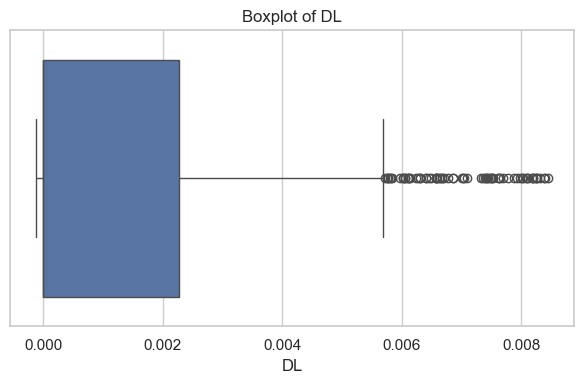

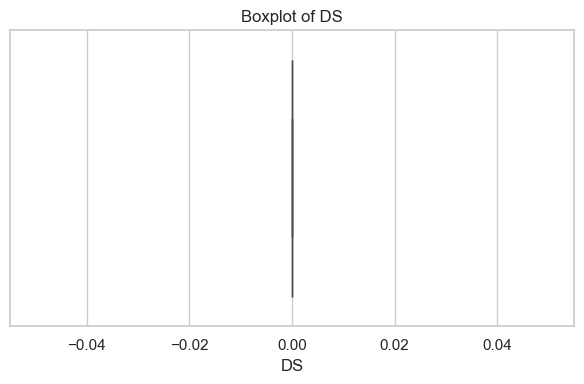

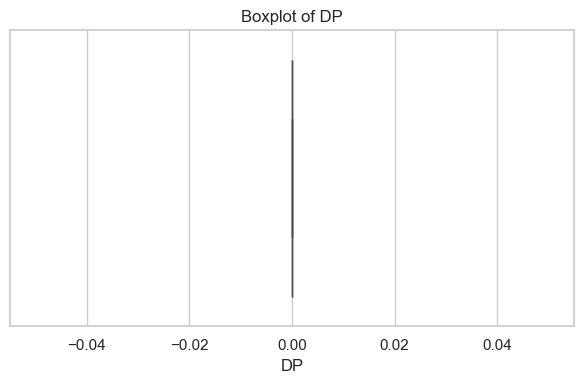

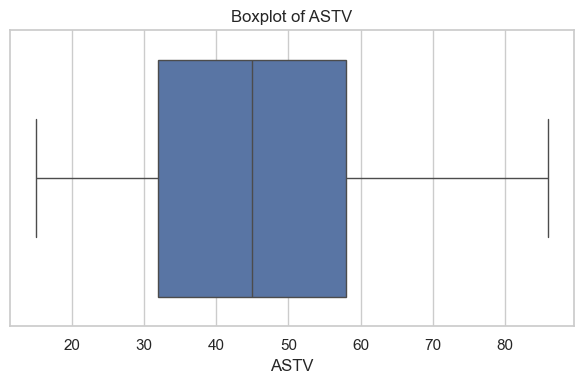

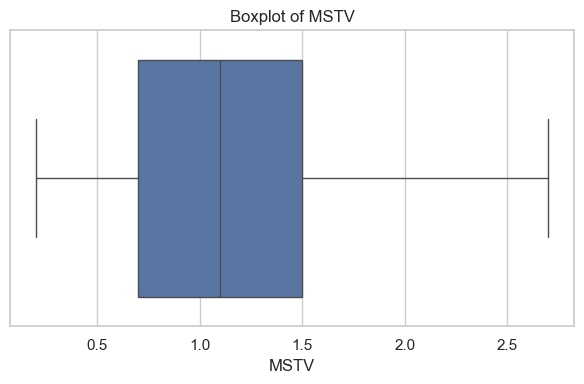

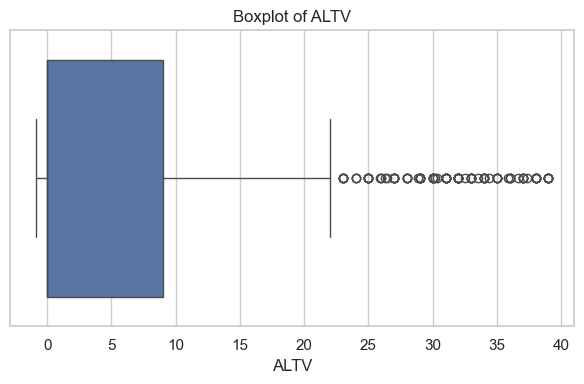

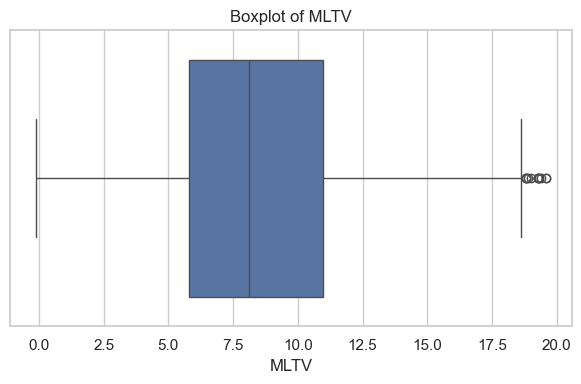

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV']

# Set style
sns.set(style='whitegrid')

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [33]:
df.isnull().sum()


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64